# Histogramme d'une image

L’histogramme d’une image est le graphique qui représente le nombre de pixels existant pour chaque valeur. 
Calculer l’histogramme de l’image en niveaux de gris, c’est en d’autres termes compter combien il y a de pixels pour chaque nuance de gris.

Formellement, pour une fonction $f:E→[0..n] ⊆ N$, l’histogramme de f est une fonction $T(f):[0,n]→N$ qui, à chaque niveau de gris v, associe le nombre d’éléments $x$ de $E$ tel que $f(x)=v$ :

$Tf(v)=|{x∈E | f(x)=v}|$

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (12,4)

In [3]:
g_img = cv.imread("assets/hawkey.png")

In [4]:
# # Cas d'une image en couleurs
# img = cv.imread("assets/hawkey.png")
# b,v,r = cv.split(img)  
# g_img = 0.299*r + 0.587*v + 0.114*b # opération matricielle
# g_img = g_img.astype(np.uint8) # convertit les réels en octets

TypeError: Image data of dtype object cannot be converted to float

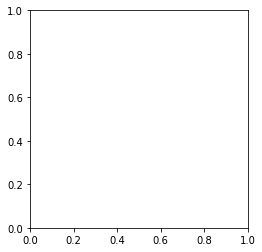

In [5]:
plt.imshow(g_img)

In [6]:
def histogramme(image: np.array) -> None: 
  histogramme = np.zeros(256,dtype=int)
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
      histogramme[image[i,j]] = histogramme[image[i,j]] + 1
  # plt.title('Histogramme de l\'image')
  # plt.xlabel('Niveaux de gris')
  # plt.ylabel('Fréquence')
  # plt.bar(np.arange(256),histogramme)
  # plt.show()
  return histogramme

In [7]:
h = histogramme(image=g_img)
plt.title('Histogramme de l\'image')
plt.xlabel('Niveaux de gris')
plt.ylabel('Fréquence')
plt.bar(np.arange(256),h)
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

# Normalisation d'un histogramme
L’opération de normalisation d’histogramme permet d’étendre la plage de valeurs d’une image en étalant de manière uniforme les niveaux de gris de l’image sur tout l’intervalle de valeurs disponibles. Afin d’améliorer la qualité visuelle de l’image on peut chercher une transformation plus complexe (non uniforme) en partant du principe qu’une image avec un histogramme plat est généralement agréable. Concrètement, au lieu de chercher une transformation affine, on cherche une transformation croissante (on veut préserver l’ordre des niveaux des gris) telle que l’histogramme de l’image transformée soit le plus proche possible d’une distribution uniforme.

Afin de définir cette transformation, nous avons besoin de la notion d’histogramme cumulé qui mesure la distribution cumulée des niveaux de gris dans une image. Pour un niveau de gris $x$, l’histogramme cumulé permet de connaitre la probabilité de tomber sur un pixel de valeur inférieure ou égale à $x$ en tirant un pixel au hasard dans l’image.

In [8]:
def histogramme_normalise(image):
  h = histogramme(image)
  hn = h/g_img.size
  plt.title('Histogramme normalisé')
  plt.bar(np.arange(256),hn)
  return hn

# Egalisation d'histogramme et histogramme cumulé
L’égalisation d’histogramme consiste à corriger une image qui manque de contraste : ses couleurs, ou ses niveaux de gris,
se concentrent sur seulement quelques valeurs.

Cette transformation va faire une conversion de couleurs :
Afin d’utiliser toute l’étendue des niveaux ;
Afin d’avoir (à peu près) autant de pixels de chaque niveau.

L’astuce consiste à d’abord calculer l’histogramme cumulé (le principe est le même que pour l’histogramme, 
si ce n’est que pour toute valeur  i  on calcule non pas le nombre de pixels de cette valeur dans l’image, 
mais on cumule le nombre de pixels de valeur égale ou inférieure à  i  dans l’image).

Ensuite, on utilise cet histogramme cumulé directement comme une table de conversion des niveaux de gris 
(pour cela, on normalise les valeurs de l’histogramme cumulé pour les ramener entre 0 et 255). L
’idée de cette conversion étant la suivante :


In [9]:
img = cv.imread("assets\hawkey.png",0)

In [10]:
img.shape

(295, 443)

In [11]:
#Fonction qui retourne l'histogramme cumulé
def histogramme_cumule(image: np.array): 
  
  h = histogramme(image)

  histogramme_cum = np.zeros(len(h),dtype=int)
  for i in range(0,len(h)):
    histogramme_cum[i] = histogramme_cum[i-1] + h[i] 

  
  # plt.bar(np.arange(256),histogramme_cum)
  # plt.show()
  
  return histogramme_cum

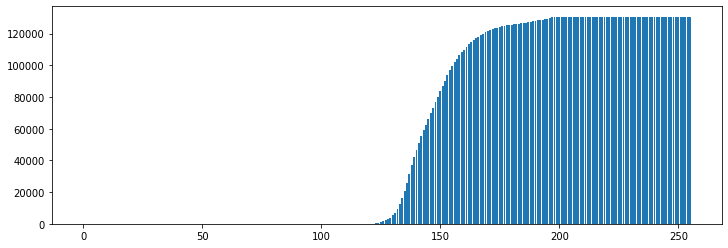

In [12]:
hc = histogramme_cumule(img)
plt.bar(np.arange(256),hc)
plt.show()

In [13]:
def histogramme_cumule_normalise(image: np.array):
  hc = histogramme_cumule(image)
  hcn = hc/image.size 
  plt.bar(np.arange(256),hc)
  plt.show()
  return hcn

In [24]:
def egaliser_histogramme(image: np.array):
  hcn = histogramme_cumule_normalise(image)
  copy_img = np.copy(image)
  copy_img = hcn[copy_img]*255
      
  plt.imshow(copy_img,cmap='gray')
  plt.show()
  return copy_img

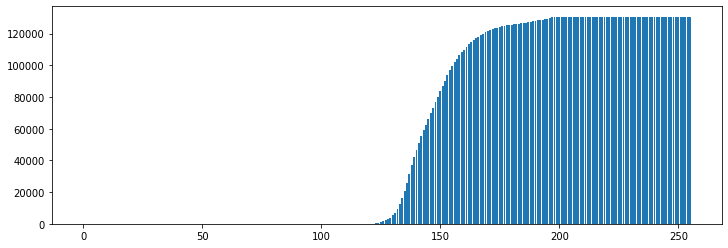

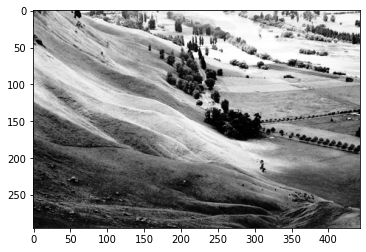

array([[107.78157401, 142.84761067, 114.94854038, ..., 235.76646134,
        234.19765084, 232.40249455],
       [203.5297471 , 107.78157401,  50.0868118 , ..., 176.31751923,
        176.31751923, 149.505299  ],
       [ 99.89264261, 107.78157401,  72.05601255, ...,  81.99376363,
         72.05601255,  81.99376363],
       ...,
       [107.78157401,  13.85392356,  13.85392356, ..., 142.84761067,
        129.19076405, 129.19076405],
       [107.78157401,  24.03363049,  31.25913456, ..., 122.15258063,
        136.18016605, 136.18016605],
       [ 91.06710793,  10.27726977,  50.0868118 , ..., 129.19076405,
        136.18016605, 129.19076405]])

In [25]:
egaliser_histogramme(img)

## Expansion de la dynamique
Tous les faibles niveaux inutilisés dans l’image (ici de 0 à 120 environ) seront ramenés à 0 ;

Tous les hauts niveaux inutilisés (ici d’environ 200 à 255) seront ramenés à 255 ;

Les seuls niveaux utilisés seront étalés entre 0 et 255 suivant la progression de l’histogramme cumulé
(tout un niveau étant déplacé vers un nouveau niveau, ce qui intercalera des « trous » de niveaux non utilisés dans l’image finale).

$I’(i,j) = \frac{(I(i,j) - Min(I)) . 255}{Max(I)-Min(I)}$

In [16]:
def expansion_dynamique(image: np.ndarray) -> None:
  min = np.min(image)
  max = np.max(image)
  new_image = np.around(255/(max-min)*(image-min)).astype(np.uint8)
  plt.imshow(new_image,cmap="gray")
  plt.show()
  return new_image

In [68]:
def expansion_dynamique(image):
  return (((image - np.min(image)*255))/(np.max(image) - np.min(image)))
  

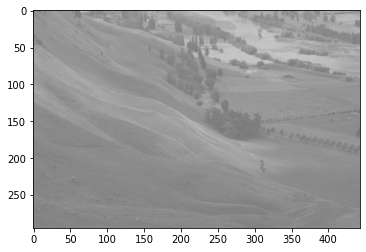

In [69]:
plt.imshow(g_img,cmap="gray")

In [1]:
et_im = expansion_dynamique(g_img)
plt.imshow(et_im,cmap="gray")

NameError: name 'expansion_dynamique' is not defined

## Histogramme cumulé

In [ ]:
#Fonction qui retourne l'histogramme cumulé
def histogramme_cumule(image: np.array): 
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle('Histogramme et histogramme cumulé')
  histogramme = np.zeros(256,dtype=int)

  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
      histogramme[image[i,j]] = histogramme[image[i,j]] + 1

  histogramme_cum = np.zeros(len(histogramme),dtype=int)
  for i in range(0,len(histogramme)):
    histogramme_cum[i] = histogramme_cum[i-1] + histogramme[i] 
  
  ax1.bar(np.arange(256),histogramme)
  ax2.bar(np.arange(256),histogramme_cum)
  plt.show()
  
  return histogramme_cum

In [ ]:
#Fonction qui retourne l'histogramme cumulé
def histogramme_cumule_normalise(image: np.array): 
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle('Histogramme et histogramme cumulé normalisé')
  
  histogramme = np.zeros(256,dtype=int)
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
      histogramme[image[i,j]] = histogramme[image[i,j]] + 1

  histogramme_cum = np.zeros(len(histogramme),dtype=int)
  for i in range(0,len(histogramme)):
    histogramme_cum[i] = histogramme_cum[i-1] + histogramme[i] 
  
  histogramme = histogramme/image.size
  histogramme_cum = histogramme_cum/image.size
  ax1.bar(np.arange(256),histogramme)
  ax2.bar(np.arange(256),histogramme_cum)
  plt.show()
  
  return histogramme_cum

On peut remarquer que, en notant N le nombre de pixel dans une image f, pour une valeur de niveau de gris $v$, $Cf(v)/N$ est la proportion de pixels ayant une valeur inférieure ou égale à v dans l’image. Dans une image visuellement agréable, l’histogramme cumulé est proche de la diagonale, dans ce cas on devrait avoir $v/n=Cf(v)/N$ : la proportion du niveau de gris v par rapport au niveau de gris maximal n est égale à la proportion de pixels ayant une valeur inférieure ou égale à v par rapport au nombre total de pixel.

En combinant cette observation avec le fait de vouloir obtenir une valeur minimale égale à Vmin et une valeur maximale égale à Vmax, on obtient la formule d’égalisation d’histogramme:

$∀v∈[0..n],eg(v)=\frac{Vmax−Vmin}{N}Cf(v)+Vmin$

In [ ]:
def egaliser_histogramme(image) -> None:
  min = np.min(image)
  max = np.max(image)
  hc = histogramme_cumule(image)
  plt.title('Image et histogramme apres egalisation')
  eg = np.round((((max-min)/image.size)*hc) + min).astype(int)
  plt.bar(np.arange(256),eg)
  plt.show()
  

In [ ]:
g_img = cv.imread("assets/hawkey.png")

In [ ]:
egaliser_histogramme(g_img)